In [1]:
import os
import numpy as np
import pandas as pd
from scipy import special, stats
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import fc_methods as fc
import helpers as hp

## Example comparison of correlation methods on random data

First, let us compare Pearson and partial correlation on randomly generated data sampled from a uniform distribution.

We will start by creating the data matrix with 50 features and 300 "timepoints".

In [18]:
np.random.seed(1234)

In [19]:
rand_matrix = np.random.rand(300,50)

Now, let's calculate the correlation and p-values matrices using both methods.

In [67]:
pearson_random, pearson_random_p = fc.pearson_corr(rand_matrix)

In [68]:
partial_random, partial_random_p = fc.partial_corr(rand_matrix)

We will visualise them side by side, so the differences will be easier to spot.

C:\Users\marcin\Anaconda3\envs\mne\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\marcin\Anaconda3\envs\mne\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\marcin\Anaconda3\envs\mne\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\marcin\Anaconda3\envs\mne\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


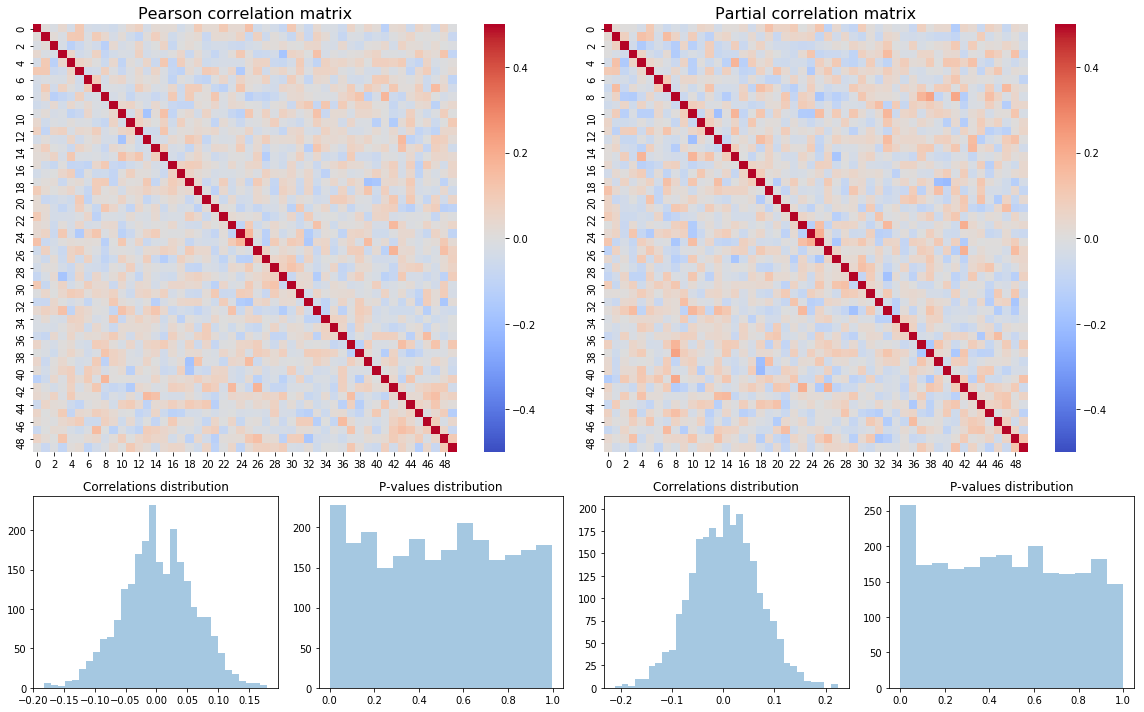

In [81]:
def plot_corr(pearson, pearson_p, partial, partial_p):
    fig = plt.figure(figsize=(16,10))
    ax = plt.subplot2grid((3,4),(0,0), colspan=2, rowspan=2)
    ax1 = plt.subplot2grid((3,4),(0,2), colspan=2, rowspan=2)
    sns.heatmap(pearson, vmin=-0.5, vmax=0.5, cmap='coolwarm', ax=ax);
    ax.set_title('Pearson correlation matrix', fontsize=16);
    sns.heatmap(partial, vmin=-0.5, vmax=0.5, cmap='coolwarm', ax=ax1);
    ax1.set_title('Partial correlation matrix', fontsize=16);

    ax2 = plt.subplot2grid((3,4),(2,0))
    ax3 = plt.subplot2grid((3,4),(2,1))
    if type(pearson) == type(pd.DataFrame()):
        sns.distplot(pearson.values.flatten()[np.where(pearson.values.flatten()<1)], kde=False, ax=ax2);
        sns.distplot(pearson_p.values.flatten(), kde=False, ax=ax3);
    else:
        sns.distplot(pearson.flatten()[np.where(pearson.flatten()<1)], kde=False, ax=ax2);
        sns.distplot(pearson_p.flatten(), kde=False, ax=ax3);
    ax2.set_title('Correlations distribution');
    ax3.set_title('P-values distribution');

    ax4 = plt.subplot2grid((3,4),(2,2))
    ax5 = plt.subplot2grid((3,4),(2,3))
    if type(partial) == type(pd.DataFrame()):
        sns.distplot(partial.values.flatten()[np.where(partial.values.flatten()<1)], kde=False, ax=ax4);
        sns.distplot(partial_p.values.flatten(), kde=False, ax=ax5);
    else:
        sns.distplot(partial.flatten()[np.where(partial.flatten()<1)], kde=False, ax=ax4);
        sns.distplot(partial_p.flatten(), kde=False, ax=ax5);
    ax4.set_title('Correlations distribution');
    ax5.set_title('P-values distribution');

    plt.tight_layout()
    
    return fig
    
corr_random = plot_corr(pearson_random, pearson_random_p, partial_random, partial_random_p)

In [70]:
folder_output = '../results/1_Pearson_vs_Partial/'
fname = folder_output + 'corr_random'

dpis = [300, 600]
formats = ['jpg', 'png', 'pdf']

hp.savef(corr_random, fname, dpis, formats)

As one could expect, when dealing with random data, there is practically no difference between Pearson and partial correlation.  
Each variable is fairly independent from others, so partial correlation gives the same results (no additional correlations that we have to control for).

## Example comparison of correlation methods on generated correlated data

Next, we will see how these methods will work with correlated data.  
We will generate some synthetic data which will follow a predefined correlation structure.  

In [71]:
true_fc = fc.generate_fc() 
simulated_data = fc.simulate_data(true_fc)

Now, let's calculate the correlation and p-values matrices using both methods.

In [72]:
pearson_sim, pearson_sim_p = fc.pearson_corr(simulated_data)

In [73]:
partial_sim, partial_sim_p = fc.partial_corr(simulated_data)

We will visualise them side by side, so the differences will be easier to spot.

C:\Users\marcin\Anaconda3\envs\mne\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\marcin\Anaconda3\envs\mne\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\marcin\Anaconda3\envs\mne\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\marcin\Anaconda3\envs\mne\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


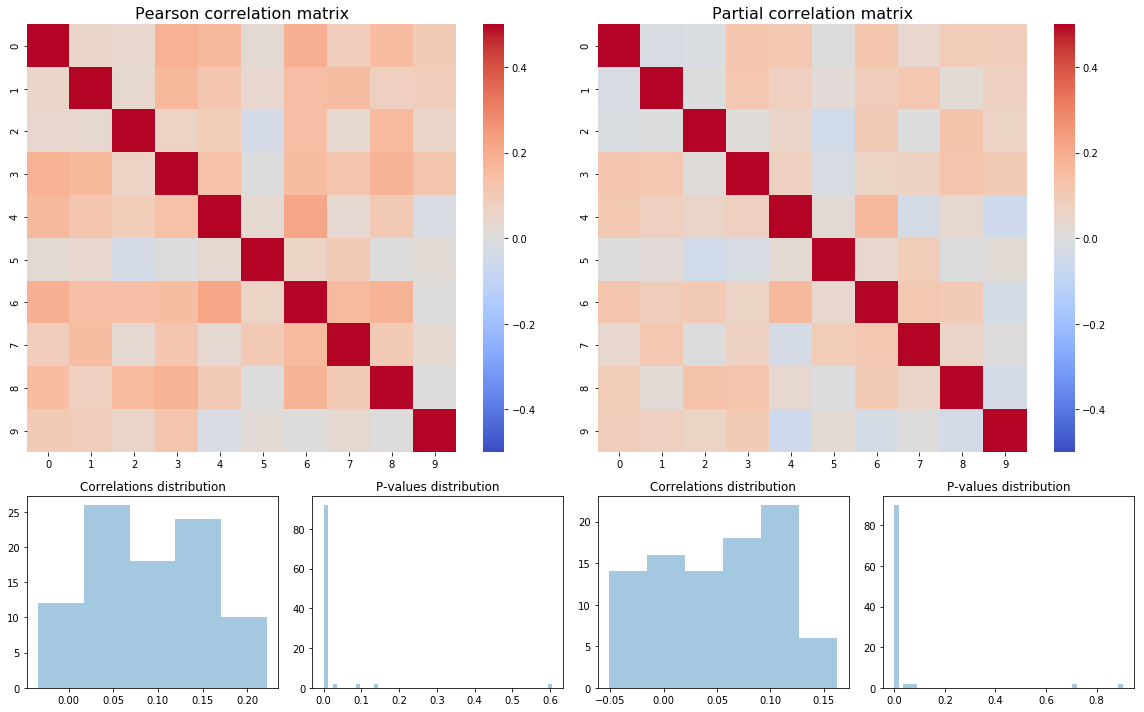

In [74]:
corr_sim = plot_corr(pearson_sim, pearson_sim_p, partial_sim, partial_sim_p)

In [75]:
folder_output = '../results/1_Pearson_vs_Partial/'
fname = folder_output + 'corr_sim'

dpis = [300, 600]
formats = ['jpg', 'png', 'pdf']

hp.savef(corr_sim, fname, dpis, formats)

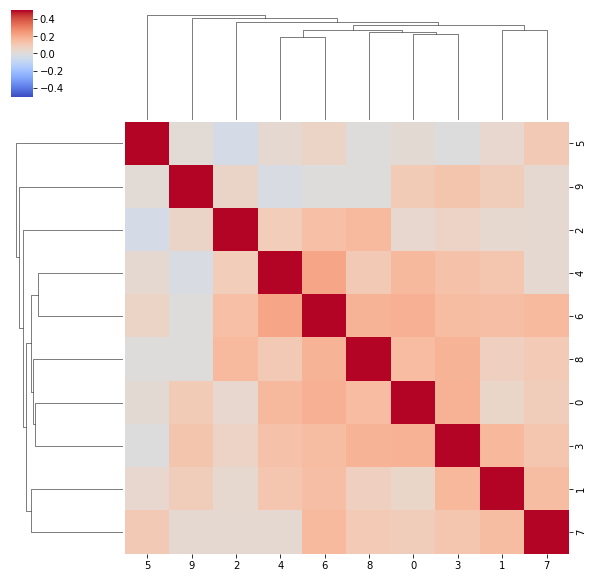

In [76]:
sns.clustermap(pearson_sim, vmin=-0.5, vmax=0.5, cmap='coolwarm');

## Example on fMRI resting-state data

In [77]:
path = '../datasets/fMRI/HCP_parcellated_smoothing5_100subjects_Glasser_restingstate_day1/100307.csv'
label_path = '../datasets/fMRI/labels_Glasser.csv'
labels = pd.read_csv(label_path, header=None)[0].values

In [78]:
pearson_fmri, pearson_fmri_p = (pd.DataFrame(fc.pearson_corr(pd.read_csv(path, header=None))[0], 
                                          index=labels, columns=labels),
                                pd.DataFrame(fc.pearson_corr(pd.read_csv(path, header=None))[1], 
                                          index=labels, columns=labels))

In [79]:
partial_fmri, partial_fmri_p = (pd.DataFrame(fc.partial_corr(pd.read_csv(path, header=None))[0], 
                                          index=labels, columns=labels),
                                pd.DataFrame(fc.partial_corr(pd.read_csv(path, header=None))[1], 
                                          index=labels, columns=labels))

C:\Users\marcin\Anaconda3\envs\mne\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\marcin\Anaconda3\envs\mne\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\marcin\Anaconda3\envs\mne\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\marcin\Anaconda3\envs\mne\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


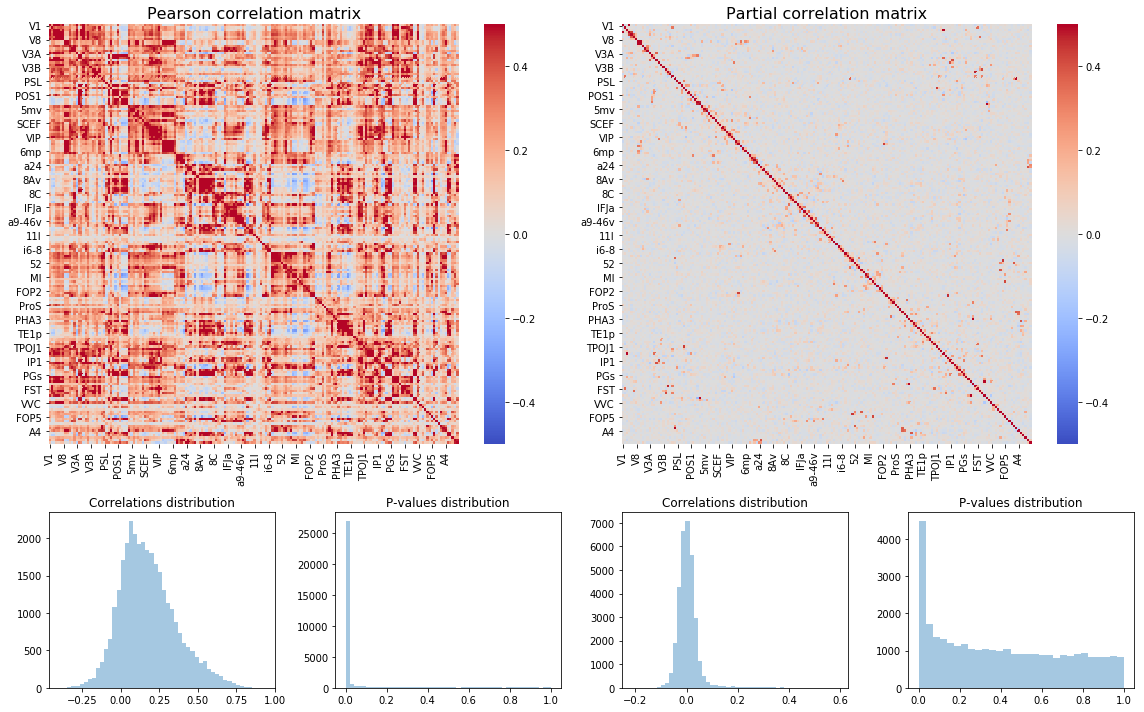

In [82]:
corr_fmri = plot_corr(pearson_fmri, pearson_fmri_p, partial_fmri, partial_fmri_p)

In [83]:
folder_output = '../results/1_Pearson_vs_Partial/'
fname = folder_output + 'corr_fmri'

dpis = [300, 600]
formats = ['jpg', 'png', 'pdf']

hp.savef(corr_fmri, fname, dpis, formats)

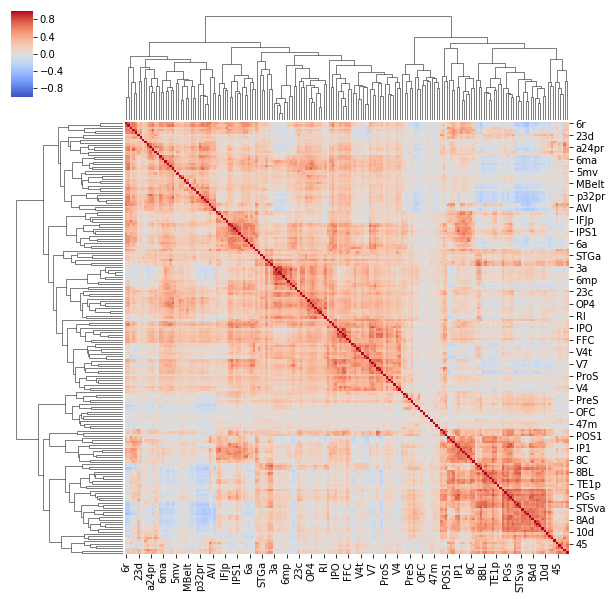

In [84]:
sns.clustermap(pearson_fmri, vmin=-1, vmax=1, cmap='coolwarm');

## Example on MEG data

In [85]:
path = '../datasets/MEG/100307.csv'

In [86]:
pearson_meg, pearson_meg_p = fc.pearson_corr(pd.read_csv(path))

In [87]:
partial_meg, partial_meg_p = fc.partial_corr(pd.read_csv(path))

C:\Users\marcin\Anaconda3\envs\mne\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\marcin\Anaconda3\envs\mne\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\marcin\Anaconda3\envs\mne\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\marcin\Anaconda3\envs\mne\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


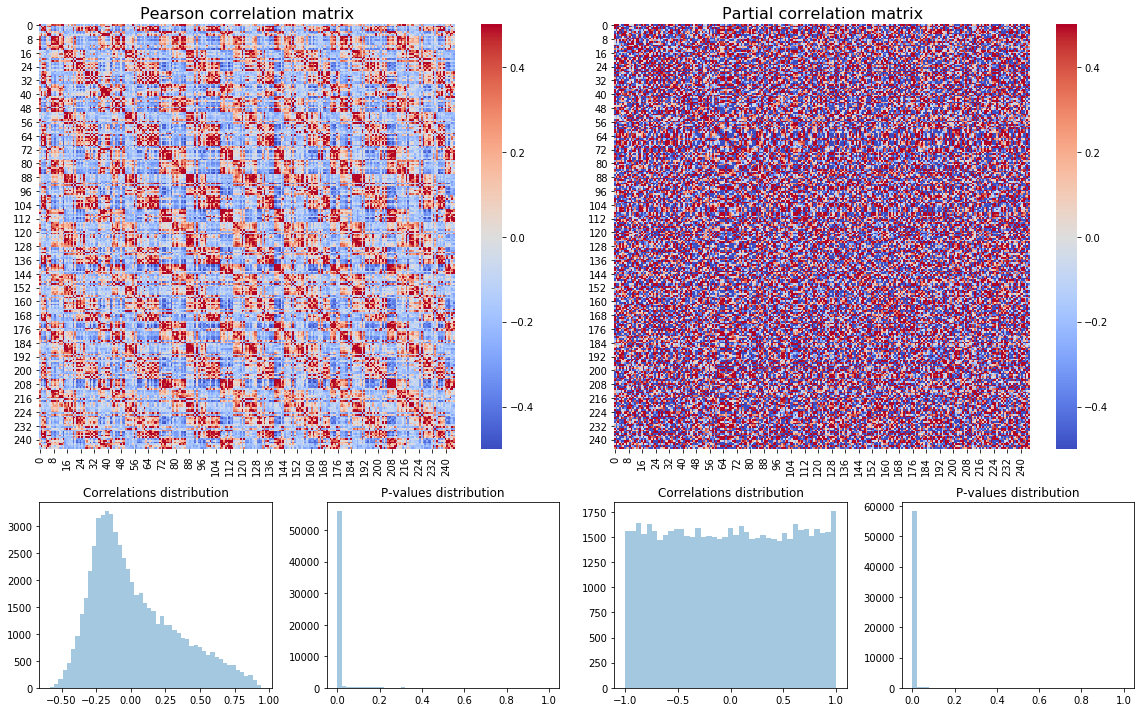

In [88]:
corr_meg = plot_corr(pearson_meg, pearson_meg_p, partial_meg, partial_meg_p)

In [89]:
folder_output = '../results/1_Pearson_vs_Partial/'
fname = folder_output + 'corr_meg'

dpis = [300, 600]
formats = ['jpg', 'png', 'pdf']

hp.savef(corr_meg, fname, dpis, formats)

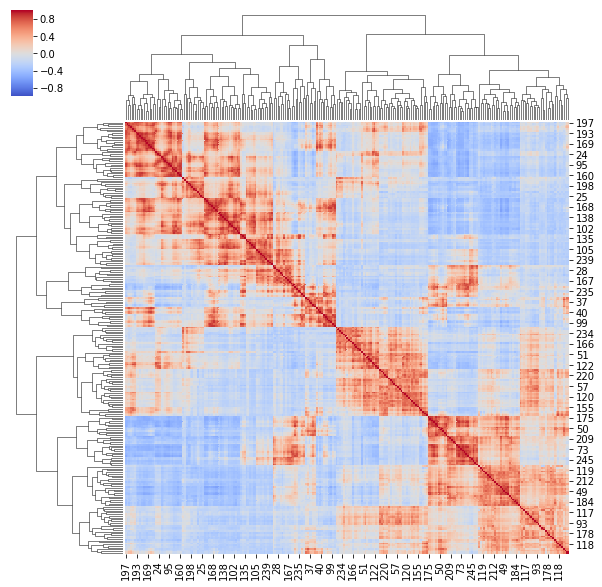

In [90]:
sns.clustermap(pearson_meg, vmin=-1, vmax=1, cmap='coolwarm');

## Example on Google trends data

In [91]:
path = '../datasets/google_trends/googletrends_allphrases_5years.csv'

In [92]:
pearson_google, pearson_google_p = fc.pearson_corr(pd.read_csv(path, sep=';', index_col='Week'))

In [93]:
partial_google, partial_google_p = fc.partial_corr(pd.read_csv(path, sep=';', index_col='Week'))

C:\Users\marcin\Anaconda3\envs\mne\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\marcin\Anaconda3\envs\mne\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\marcin\Anaconda3\envs\mne\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\marcin\Anaconda3\envs\mne\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


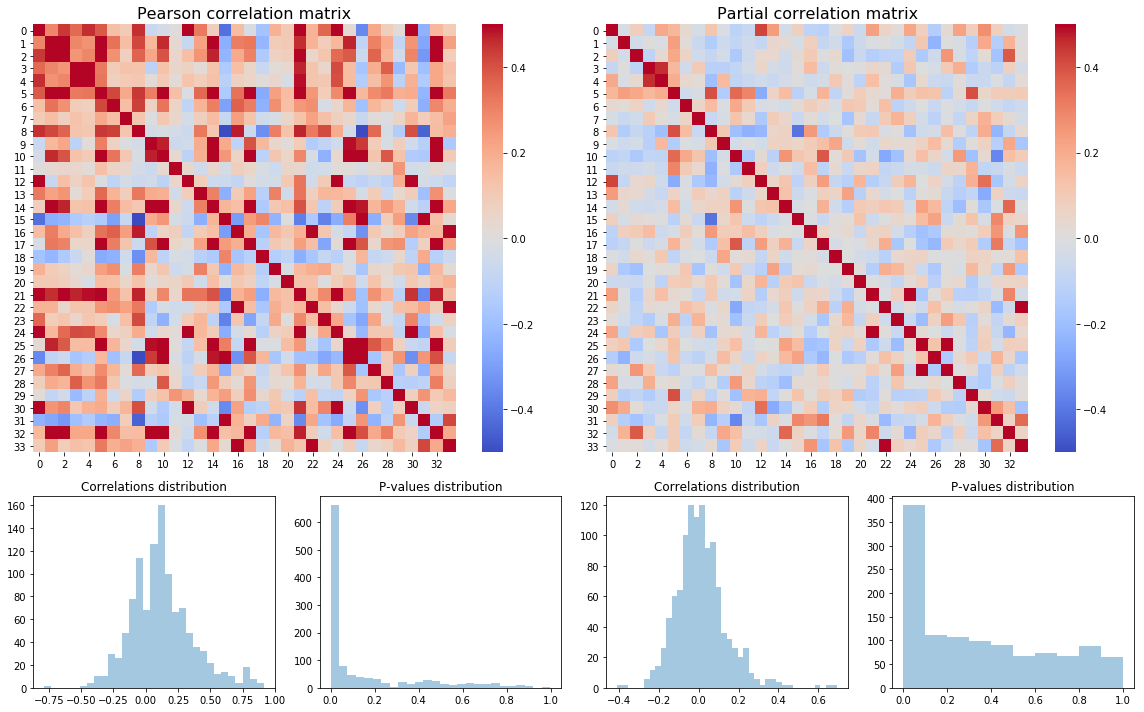

In [96]:
corr_google = plot_corr(pearson_google, pearson_google_p, partial_google, partial_google_p)

In [97]:
folder_output = '../results/1_Pearson_vs_Partial/'
fname = folder_output + 'corr_google'

dpis = [300, 600]
formats = ['jpg', 'png', 'pdf']

hp.savef(corr_google, fname, dpis, formats)

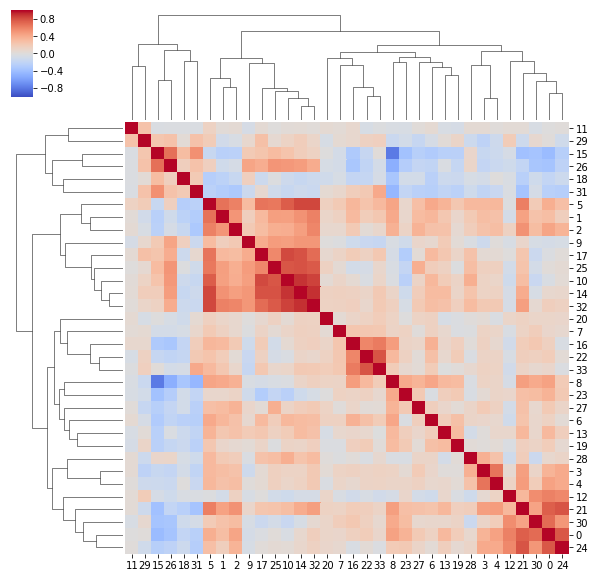

In [98]:
sns.clustermap(pearson_google, vmin=-1, vmax=1, cmap='coolwarm');

## Example on stock exchange data

In [100]:
path = '../datasets/stock_exchange/alldata.csv'

In [103]:
pearson_stock, pearson_stock_p = fc.pearson_corr(pd.read_csv(path, index_col='date'))

In [105]:
partial_stock, partial_stock_p = fc.partial_corr(pd.read_csv(path, index_col='date'))

C:\Users\marcin\Anaconda3\envs\mne\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\marcin\Anaconda3\envs\mne\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\marcin\Anaconda3\envs\mne\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\marcin\Anaconda3\envs\mne\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


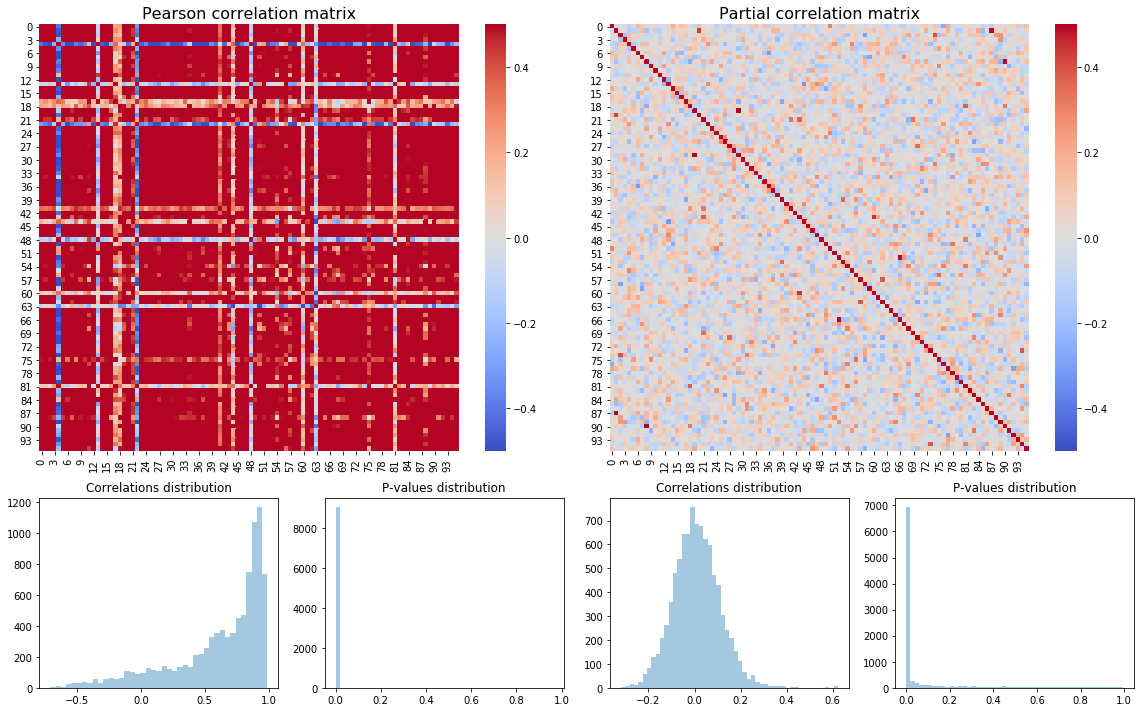

In [106]:
corr_stock = plot_corr(pearson_stock, pearson_stock_p, partial_stock, partial_stock_p)

In [107]:
folder_output = '../results/1_Pearson_vs_Partial/'
fname = folder_output + 'corr_stock'

dpis = [300, 600]
formats = ['jpg', 'png', 'pdf']

hp.savef(corr_stock, fname, dpis, formats)

## Example on weather data

In [108]:
path = '../datasets/weather/data_by_airport/5_LosAngeles.csv'

In [130]:
pearson_weather, pearson_weather_p = fc.pearson_corr(pd.read_csv(path, sep=';', usecols=[2,3,5,8,11,13], index_col='Date').dropna())

In [131]:
partial_weather, partial_weather_p = fc.partial_corr(pd.read_csv(path, sep=';', usecols=[2,3,5,8,11,13], index_col='Date').dropna())

C:\Users\marcin\Anaconda3\envs\mne\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\marcin\Anaconda3\envs\mne\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\marcin\Anaconda3\envs\mne\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\marcin\Anaconda3\envs\mne\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


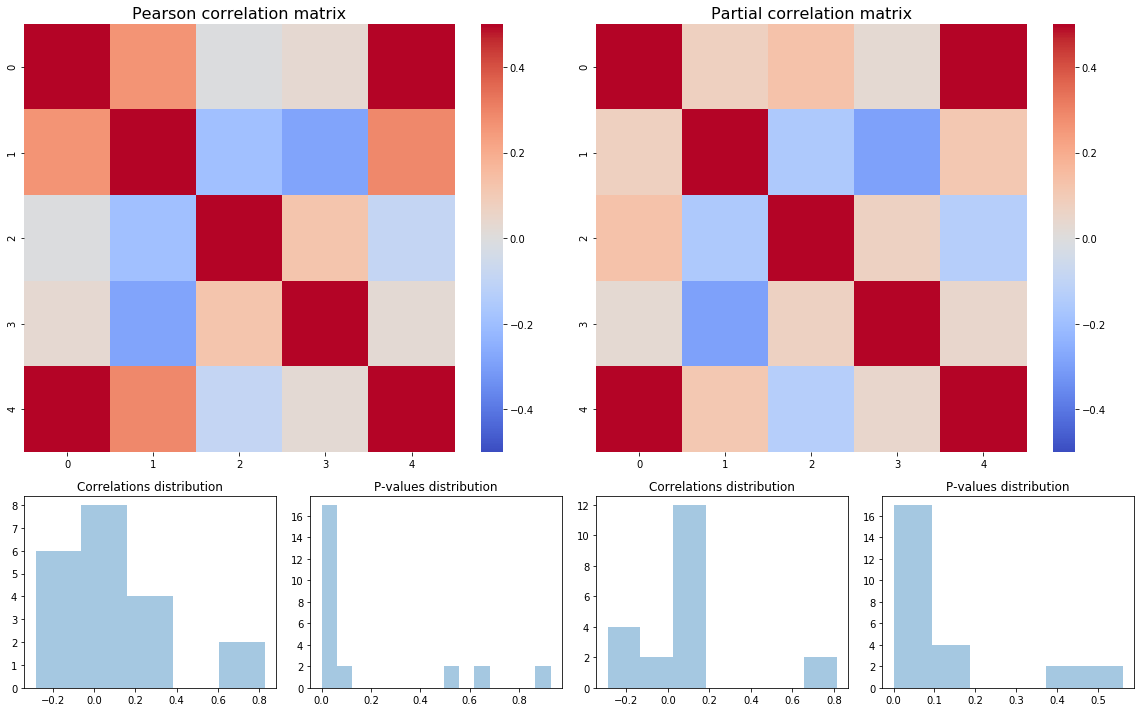

In [132]:
corr_weather = plot_corr(pearson_weather, pearson_weather_p, partial_weather, partial_weather_p)

In [133]:
folder_output = '../results/1_Pearson_vs_Partial/'
fname = folder_output + 'corr_weather'

dpis = [300, 600]
formats = ['jpg', 'png', 'pdf']

hp.savef(corr_weather, fname, dpis, formats)

### Berkson's Paradox

In [15]:
x1 = np.random.randint(0,100,100)
x2 = np.random.randint(0,100,100)
x3 = 0.5*x1 + 0.5*x2

In [16]:
xxx = np.column_stack([x1,x2,x3])

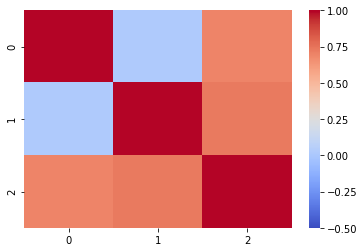

In [17]:
sns.heatmap(fc.pearson_corr(xxx)[0], vmin=-0.5, vmax=1, cmap='coolwarm');

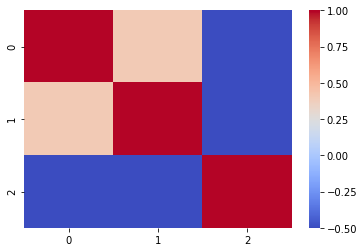

In [18]:
sns.heatmap(fc.partial_corr(xxx)[0], vmin=-0.5, vmax=1, cmap='coolwarm');